In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('property_market_final.xlsx')

In [3]:
df.head()

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
0,Wrocław,Fabryczna,Wynajem,Kawalerka,1800.0,Brak możliwości negocjacji,35,1,https://www.olx.pl/d/oferta/kawalerka-do-wynaj...
1,Wrocław,Psie Pole,Wynajem,Kawalerka,1700.0,Brak możliwości negocjacji,22,1,https://www.olx.pl/d/oferta/nowoczesna-kawaler...
2,Wrocław,Fabryczna,Wynajem,Kawalerka,2100.0,Brak możliwości negocjacji,25,1,https://www.olx.pl/d/oferta/kuzniki-kawalerka-...
3,Wrocław,Fabryczna,Wynajem,Kawalerka,2413.0,Brak możliwości negocjacji,26,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
4,Wrocław,Fabryczna,Wynajem,Kawalerka,2200.0,Brak możliwości negocjacji,32,1,https://www.olx.pl/d/oferta/wynajme-duza-kawal...


# 1. Opis danych


In [4]:
cities = df['City'].unique()
categ = df['Category'].unique()
prop_lay = df['Property layout'].unique()
neg_op = df['Negotiation'].unique()

print('City:  miasta ujęte w analizie: ',cities)
print('District:  dzielnica w jakiej znajduje się mieszkanie')
print('Category:  informacja czy mieszkanie jest na wynajem/sprzedaż')
print('Property layout:  informacja o rozkładzie mieszkania :', prop_lay)
print('Negotiation:  Czy właściciel zaznaczył możliwość negocjacji zaproponowanej ceny:', neg_op)
print('Sq_meters: powierzchnia mieszkania [m2]')
print('Rooms:  ilość pokoi (numeryczny odpowiednik Property layout)')
print('WebLink:  link do strony z ofertą')

City:  miasta ujęte w analizie:  ['Wrocław' 'Warszawa' 'Poznań' 'Gdańsk' 'Kraków']
District:  dzielnica w jakiej znajduje się mieszkanie
Category:  informacja czy mieszkanie jest na wynajem/sprzedaż
Property layout:  informacja o rozkładzie mieszkania : ['Kawalerka' '2-pokoje' '3-pokoje' '4-pokoje']
Negotiation:  Czy właściciel zaznaczył możliwość negocjacji zaproponowanej ceny: ['Brak możliwości negocjacji' 'Do negocjacji']
Sq_meters: powierzchnia mieszkania [m2]
Rooms:  ilość pokoi (numeryczny odpowiednik Property layout)
WebLink:  link do strony z ofertą


In [5]:
df.isna().any() 

City               False
District           False
Category           False
Property layout    False
Price              False
Negotiation        False
Sq_meters          False
Rooms              False
WebLink            False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500 entries, 0 to 18499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             18500 non-null  object 
 1   District         18500 non-null  object 
 2   Category         18500 non-null  object 
 3   Property layout  18500 non-null  object 
 4   Price            18500 non-null  float64
 5   Negotiation      18500 non-null  object 
 6   Sq_meters        18500 non-null  int64  
 7   Rooms            18500 non-null  int64  
 8   WebLink          18500 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ MB


1.  Brak wartości NaN
2.  18 500 rekordów do analizy 

# 2. Analiza danych

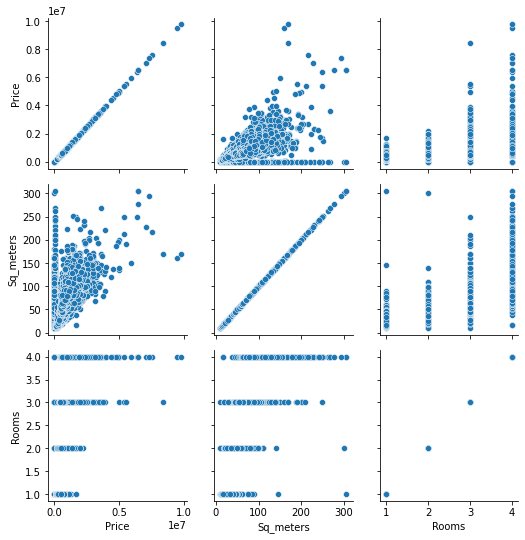

In [7]:
# sns.pairplot(data=df)

g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [8]:
df.select_dtypes('number').corr()

,Price,Sq_meters,Rooms
Price,1.000000,0.510790,0.409764
Sq_meters,0.510790,1.000000,0.760887
Rooms,0.409764,0.760887,1.000000


Z powyższego wykresu (Price vs Sq_meters) widać, że kwota rośnie wraz ze wzrotem powierzchni mieszkania. 
Obserwujemy dodatkowo, że wykres rozbiega sie na dwie proste wynika to z tego, że w danych uwzglednione są kwoty wynajmu mieszkania (mniejsze) i kwoty sprzedaży (wyższe). Dlatego obserwujemy punkty układające się w bardziej "spłaszoną" linię blisko osi OX. 

Kolejną naturalną obserwacją jest wzrost ceny wraz ze wzrostem liczby pokoi. Powiązane jest to z poprzednią obserwacją. Większa ilość pokoi oznacza większą powierzchnię mieszkania co przekłada się na jego cenę. Widać to też w macierzy korelacji: m2 i ilość pokoi silnie skorelowane 

In [9]:
#Count offer
min_off_c = df.groupby(['City','Category','Property layout']).describe()['Price']['count'].sort_values()[:3]
max_off_c = df.groupby(['City','Category','Property layout']).describe()['Price']['count'].sort_values(ascending=False)[:3]

#Max and min values
min_off = df.groupby(['City','Category','Property layout']).describe()['Price']['min'].sort_values()[:3]
max_off = df.groupby(['City','Category','Property layout']).describe()['Price']['max'].sort_values(ascending=False)[:3]

df.groupby(['City','Category','Property layout']).describe()['Price']

count          mean           std   
City     Category Property layout                                       
Gdańsk   Sprzedaz 2-pokoje          397.0  5.339637e+05  1.879391e+05  \
                  3-pokoje          361.0  7.881253e+05  4.417137e+05   
                  4-pokoje          139.0  1.082598e+06  5.384640e+05   
                  Kawalerka          94.0  4.473062e+05  2.055259e+05   
         Wynajem  2-pokoje          330.0  2.861930e+03  6.689381e+02   
                  3-pokoje          120.0  3.621250e+03  9.624876e+02   
                  4-pokoje           26.0  5.546115e+03  1.821732e+03   
                  Kawalerka         127.0  2.307057e+03  4.605610e+02   
Kraków   Sprzedaz 2-pokoje          675.0  5.862556e+05  1.984744e+05   
                  3-pokoje          711.0  7.485824e+05  2.927746e+05   
                  4-pokoje          256.0  1.171613e+06  8.118902e+05   
                  Kawalerka         224.0  3.622445e+05  1.549197e+05   
         Wynajem  2-pokoje          996.0  2.783573e+03  6.177134e+02   
                  3-pokoje          533.0  3.630904e+03  1.182509e+03   
                  4-pokoje           77.0  5.436039e+03  2.954169e+03   
                  Kawalerka         602.0  2.195058e+03  4.203497e+02   
Poznań   Sprzedaz 2-pokoje          379.0  4.788411e+05  1.405992e+05   
                  3-pokoje          393.0  6.115700e+05  1.861724e+05   
                  4-pokoje          197.0  8.647952e+05  3.831151e+05   
                  Kawalerka         136.0  3.595074e+05  9.439526e+04   
         Wynajem  2-pokoje          922.0  2.436138e+03  2.299580e+03   
                  3-pokoje          347.0  3.061850e+03  1.482819e+03   
                  4-pokoje           46.0  3.875826e+03  1.797288e+03   
                  Kawalerka         308.0  1.949014e+03  2.911145e+02   
Warszawa Sprzedaz 2-pokoje         1003.0  6.775619e+05  2.107270e+05   
                  3-pokoje          994.0  9.150440e+05  5.201034e+05   
                  4-pokoje          494.0  1.528240e+06  1.094902e+06   
                  Kawalerka         329.0  4.842520e+05  1.591785e+05   
         Wynajem  2-pokoje         1007.0  3.343502e+03  8.356770e+02   
                  3-pokoje          960.0  4.912433e+03  2.437263e+03   
                  4-pokoje          198.0  8.426540e+03  5.386213e+03   
                  Kawalerka         958.0  2.501812e+03  4.654861e+02   
Wrocław  Sprzedaz 2-pokoje          701.0  5.393264e+05  1.725519e+05   
                  3-pokoje          706.0  7.221715e+05  4.078039e+05   
                  4-pokoje          320.0  9.166767e+05  4.263747e+05   
                  Kawalerka         159.0  4.047746e+05  1.153718e+05   
         Wynajem  2-pokoje          999.0  2.773099e+03  5.903394e+02   
                  3-pokoje          568.0  3.559659e+03  1.243861e+03   
                  4-pokoje          101.0  5.418485e+03  2.413030e+03   
                  Kawalerka         607.0  2.217284e+03  3.218260e+02   

                                        min        25%        50%        75%   
City     Category Property layout                                              
Gdańsk   Sprzedaz 2-pokoje          39000.0  409000.00   484911.0   600000.0  \
                  3-pokoje         199000.0  549000.00   640328.0   850000.0   
                  4-pokoje         375000.0  715221.00   915000.0  1349000.0   
                  Kawalerka         20000.0  351250.00   389000.0   490000.0   
         Wynajem  2-pokoje           1650.0    2500.00     2700.0     3190.0   
                  3-pokoje           2500.0    3000.00     3500.0     3990.0   
                  4-pokoje           2900.0    4049.25     5500.0     6500.0   
                  Kawalerka          1650.0    2000.00     2200.0     2557.0   
Kraków   Sprzedaz 2-pokoje         183692.0  470000.00   549000.0   650000.0   
                  3-pokoje         225790.0  559000.00   670000.0   839500.0   
         

In [10]:
print('3 miasta z najmniejszą liczbą ogłoszeń w swojej kategorii: ')
print('')
print(min_off_c)

3 miasta z najmniejszą liczbą ogłoszeń w swojej kategorii: 

City    Category  Property layout
Gdańsk  Wynajem   4-pokoje           26.0
Poznań  Wynajem   4-pokoje           46.0
Kraków  Wynajem   4-pokoje           77.0
Name: count, dtype: float64


In [11]:
print('Miasta z największą liczbą ogłoszeń w swojej kategorii: ')
print('')
print(max_off_c)

Miasta z największą liczbą ogłoszeń w swojej kategorii: 

City      Category  Property layout
Warszawa  Wynajem   2-pokoje           1007.0
          Sprzedaz  2-pokoje           1003.0
Wrocław   Wynajem   2-pokoje            999.0
Name: count, dtype: float64


In [12]:
print('3 najtańsze oferty: ')
print('')
min_off

3 najtańsze oferty: 



City     Category  Property layout
Poznań   Wynajem   Kawalerka          1610.0
                   2-pokoje           1630.0
Wrocław  Wynajem   Kawalerka          1650.0
Name: min, dtype: float64

In [13]:
print('3 najdroższe oferty: ')
print('')
max_off

3 najdroższe oferty: 



City      Category  Property layout
Warszawa  Sprzedaz  4-pokoje           9750000.0
                    3-pokoje           8400000.0
Kraków    Sprzedaz  4-pokoje           7553700.0
Name: max, dtype: float64

1. Najmniej ofert znajdowało się w Gdańsku, Poznaniu i Krakowie - wszystkie dotyczyły ofert na mieszkania 4-pokojowe. Najmnieszy wybór jest w Gdańsku (tylko 26 ofert). 

2. Największy wybór mamy w Warszawie oraz we Wrocławiu w kateogrii mieszkań 2-pokojowych. 

3. Trzy najtańsze oferty to dwie Kawalerki za ponad 1600zł we Wrocławiu i Poznaniu i jedno mieszkanie 2-pokojowe w Poznaniu za 1630 zł

4. Najdroższe oferty są w Warszawie i Krakowie. Dotyczą one dużych mieszkań 4 i 3 pokojowych. Najdroższe z nich znajduje się w Warszawie i jest za prawie 10 mln zł. Kolejne są za 8,5 i 7,5 mln. 

# 2.1 Ile średnio zapłaci się za mieszkanie?

Text(0.5, 1.0, 'Mediana wynajmu nieruchomości a miasto i rodziaj mieszkania')

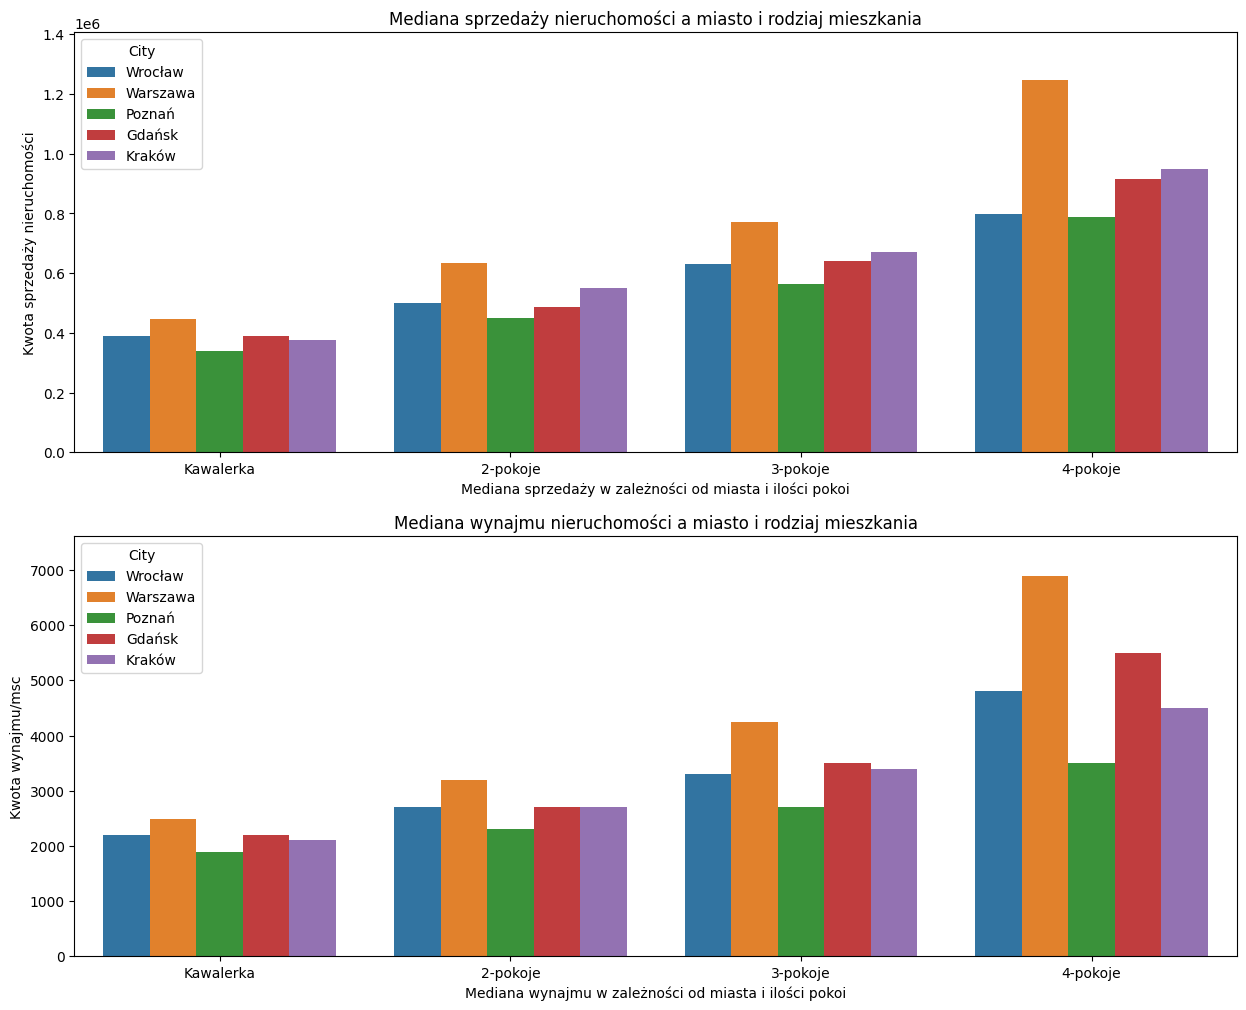

In [14]:
df_sell = df[df['Category']=='Sprzedaz'].copy()
df_rent = df[df['Category']=='Wynajem'].copy()

fig, ax = plt.subplots(2,1, figsize=(15,12))

sns.barplot(data=df_sell, x='Property layout', y='Price', hue='City', estimator=np.median, ax=ax[0],errwidth=0)
ax[0].set_xlabel('Mediana sprzedaży w zależności od miasta i ilości pokoi')
ax[0].set_ylabel('Kwota sprzedaży nieruchomości')
ax[0].set_title('Mediana sprzedaży nieruchomości a miasto i rodziaj mieszkania')

sns.barplot(data=df_rent, x='Property layout', y='Price', hue='City', estimator=np.median, ax=ax[1], errwidth=0)
ax[1].set_xlabel('Mediana wynajmu w zależności od miasta i ilości pokoi')
ax[1].set_ylabel('Kwota wynajmu/msc')
ax[1].set_title('Mediana wynajmu nieruchomości a miasto i rodziaj mieszkania')

Zastosowano **medianę** jako estymator, aby ograniczych wpływ wartości odstających. 

**Kategoria sprzedaż**: 

Zdecydowanie widać, że średnio największe kwoty za zakup mieszkania o dowolnym rozkładzie są w Warszawie. Wyróżniają się one na tle innych miast, szczególnie, widać to dla wartości 4-pokojowcyh mieszkań z medianą ponad 1.2 mln zł. Kolejny jest Kraków i Gdańsk (około 1 mln). Natomiast we Wrocławiu i Poznaniu ceny 4-pokojowego mieszkania są podobne i wynoszą około 800 tyś. zł. 
Dla mieszkań 2 i 3 pokojowych zauważamy podobny rozkład cen jak dla mieszkań 4-pokojowych. 
Średnio najtańszą kawalerkę kupimy w Poznaniu (370 tys). We Wrocławiu, Gdańsku czy Krakowie ceny są dość podobne. 

**Kategoria wynajem**:

Średnio najtańszą kawalerkę wynajmiemy w Poznaniu (poniżej 2 tyś.). We Wrocławiu, Gdańsku, Krakowie czy Warszawie ceny są dość podobne jednak średnia kwota jest większa i wynosi lekko powyżej 2 tyś. zł/msc. Dla mieszkań 2 i 3 pokojowych obserwujemy ten sam trend jak dla kawalerek. 
Sytuacja zmienia się dla mieszkań 4-pokojowych, gdzie dominuje Warszawa (ponad 6 tyś/msc), kolejmy jest Gdańsk (ok. 5.5 tys/msc). Wrocław i Kraków średnio około 5 tys miesięcznie. Natomiast Poznań około 3.5 tyś/msc. 

W Poznaniu za 4-pokojwe mieszkanie zapłacimy średnio tyle samo co za 3-pokojowe mieszkanie we Wrocławiu, Gdańsku czy Krakowie. 




# 2.2 Jaka jest stawka za m2 mieszkania w zależności od miasta? 

<Axes: xlabel='City,Property layout'>

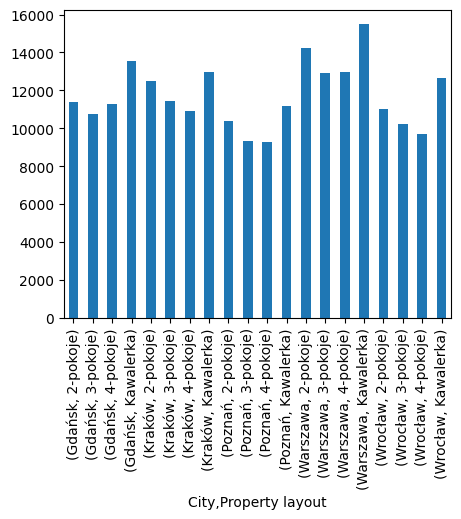

In [15]:
df_sell = df[df['Category']=='Sprzedaz'].copy()
df_sell['Price/m2'] = df_sell['Price']/df['Sq_meters']

df_sell.groupby(['City','Property layout'])['Price/m2'].median().plot.bar(figsize=(5,4))

Text(0.5, 1.0, 'Kwota za m2 w zależności od miasta i rodzaju mieszkania dla mieszkań na sprzedaż')

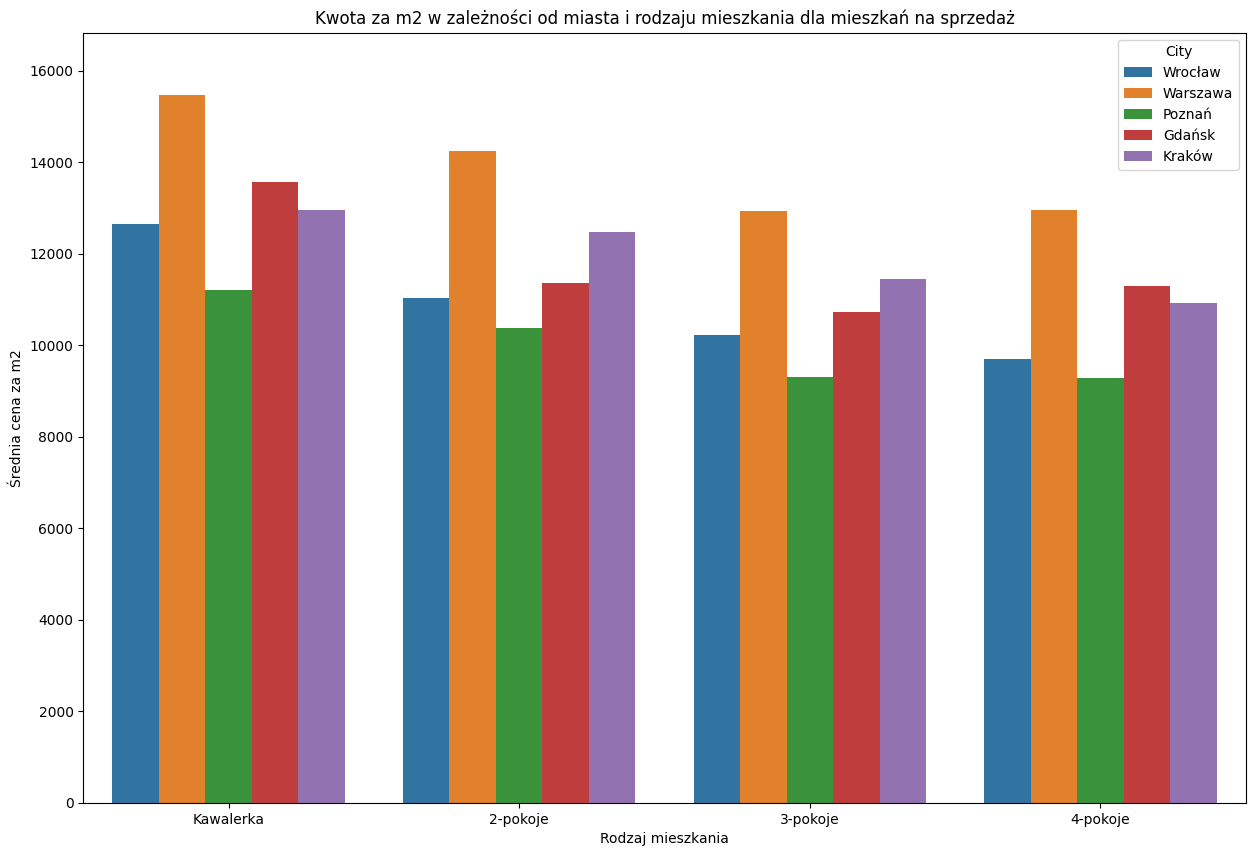

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(data=df_sell, x='Property layout', y='Price/m2', hue='City', estimator=np.median, ax=ax,errwidth=0)
ax.set_ylabel('Średnia cena za m2')
ax.set_xlabel('Rodzaj mieszkania')
ax.set_title('Kwota za m2 w zależności od miasta i rodzaju mieszkania dla mieszkań na sprzedaż')

Miastem dominującym ponownie jest Warszawa. Niezależnie od rodzaju mieszkania kwoty za m2 są największe. Za m2 kawalerki w Warszawie zapłacimy najwięcej bo ponad 15 tyś zł, kwota za pozostałe rodzaje mieszkań w Warszawie będzie spadać wraz ze wzrostem ilości pomieszczeń aż do około 13 tyś/m2.

Kolejnymi miastami jest Gdańsk i Kraków, które zaraz po Warszawie mają największy średni współczynnik kwoty do m2. Mimo tego że średnie ceny dla kawalerek w tych miastach są podobne to osiągają one wysokie wartosci. Oznacza to że płacimy więcej za mniejszą powierzchnię.    


Mediana powierzhcni kawalerek 30.0


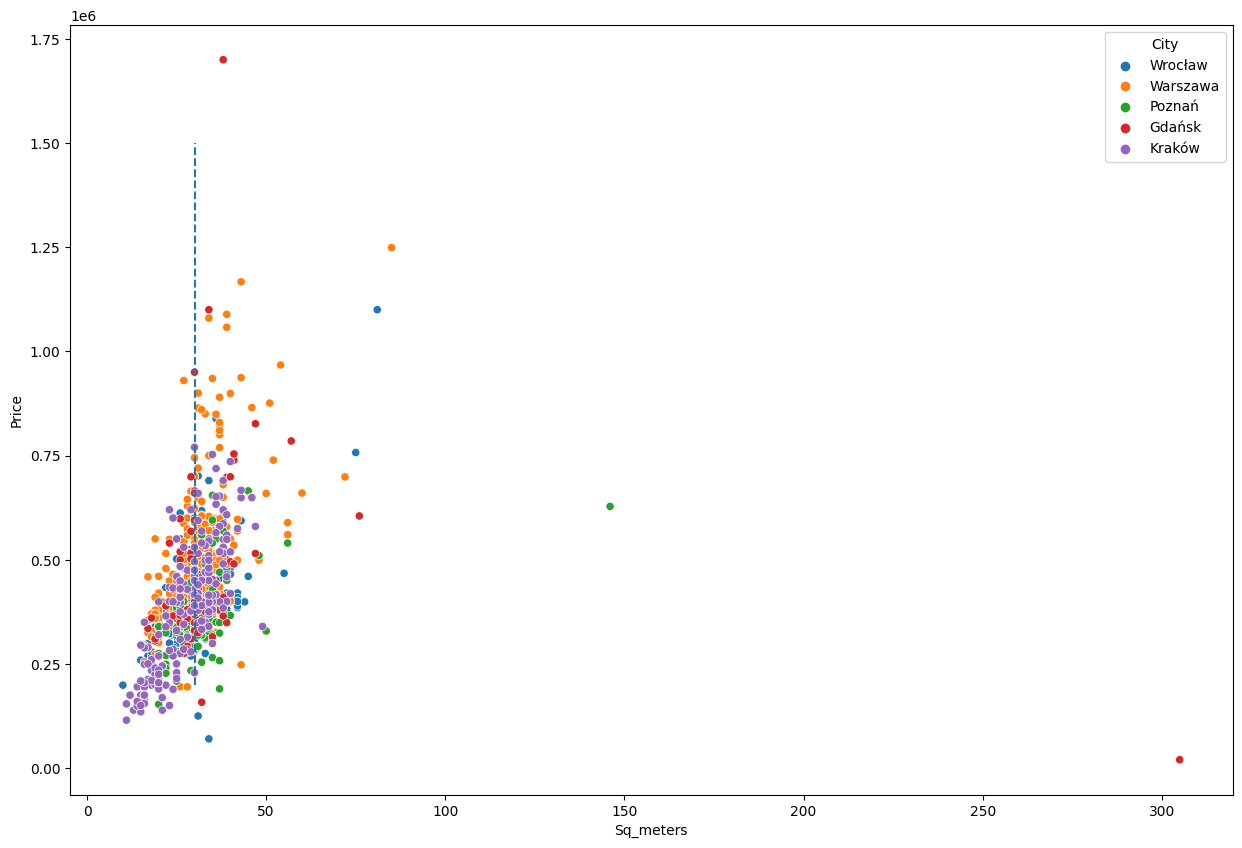

In [17]:
df_one_flat_sell = df_sell[df_sell['Property layout'] == 'Kawalerka']
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df_one_flat_sell, x='Sq_meters', y='Price', hue='City',ax=ax)
ax.vlines(30, 0.2e6,1.5e6, linestyles='dashed')
print('Mediana powierzhcni kawalerek',df_one_flat_sell['Sq_meters'].median())

Zgodnie z powyższym wykresem widać zależność ceny od powierzchni dla kawalerek na sprzedaż wraz z zaznaczoną średnią powierzchnią mieszkań (niebieska przerywana linia). Najdroższe mieszkania poniżej średniej wielkości należą do Gdańska, Krakowa i Warszawy. Jest to jednak kilka rekordów a nie ogólna charakterystyka. Na te ceny może mieć równierz wpływ dzielnicy w jakiej znajduje się dana kawalerka (np. bardziej prestiżowa). 

Na tym wykresie widać też kilka rekordów odstająych dla Poznania i Gdańska.


In [18]:
df_one_flat_sell[df_one_flat_sell['Sq_meters'] >140]

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink,Price/m2
11857,Poznań,Jeżyce,Sprzedaz,Kawalerka,628000.0,Brak możliwości negocjacji,146,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,4301.369863
13443,Gdańsk,Olszynka,Sprzedaz,Kawalerka,20000.0,Brak możliwości negocjacji,305,1,https://www.olx.pl/d/oferta/odstapie-uzytkowan...,65.573770


In [19]:
df_one_flat_sell.loc[11857]['WebLink'] #Potencjalna okazja (duże kawalerka)

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/mieszkania-dabrowskiego-kochanowskiego-jezyce-ID4iryo.html'

In [20]:
df_one_flat_sell.loc[13443]['WebLink'] #Błędnie zakfalifikowana działka z ROD

'https://www.olx.pl/d/oferta/odstapie-uzytkowanie-dzialki-rod-CID3-IDUFGYY.html'

Potencjalne okazje będzie można szukać poprzez znajdowanie dużych mieszkań za małą kwotę. 

Prawy dolny róg wykresu od linii przerywnej (średniej powierzchni) 

# 2.3 Jak zmieniają się ceny w zależności od powierzchni mieszkań w różnych miastach? 

Text(0.5, 1.0, 'Mieszkania na wynajem')

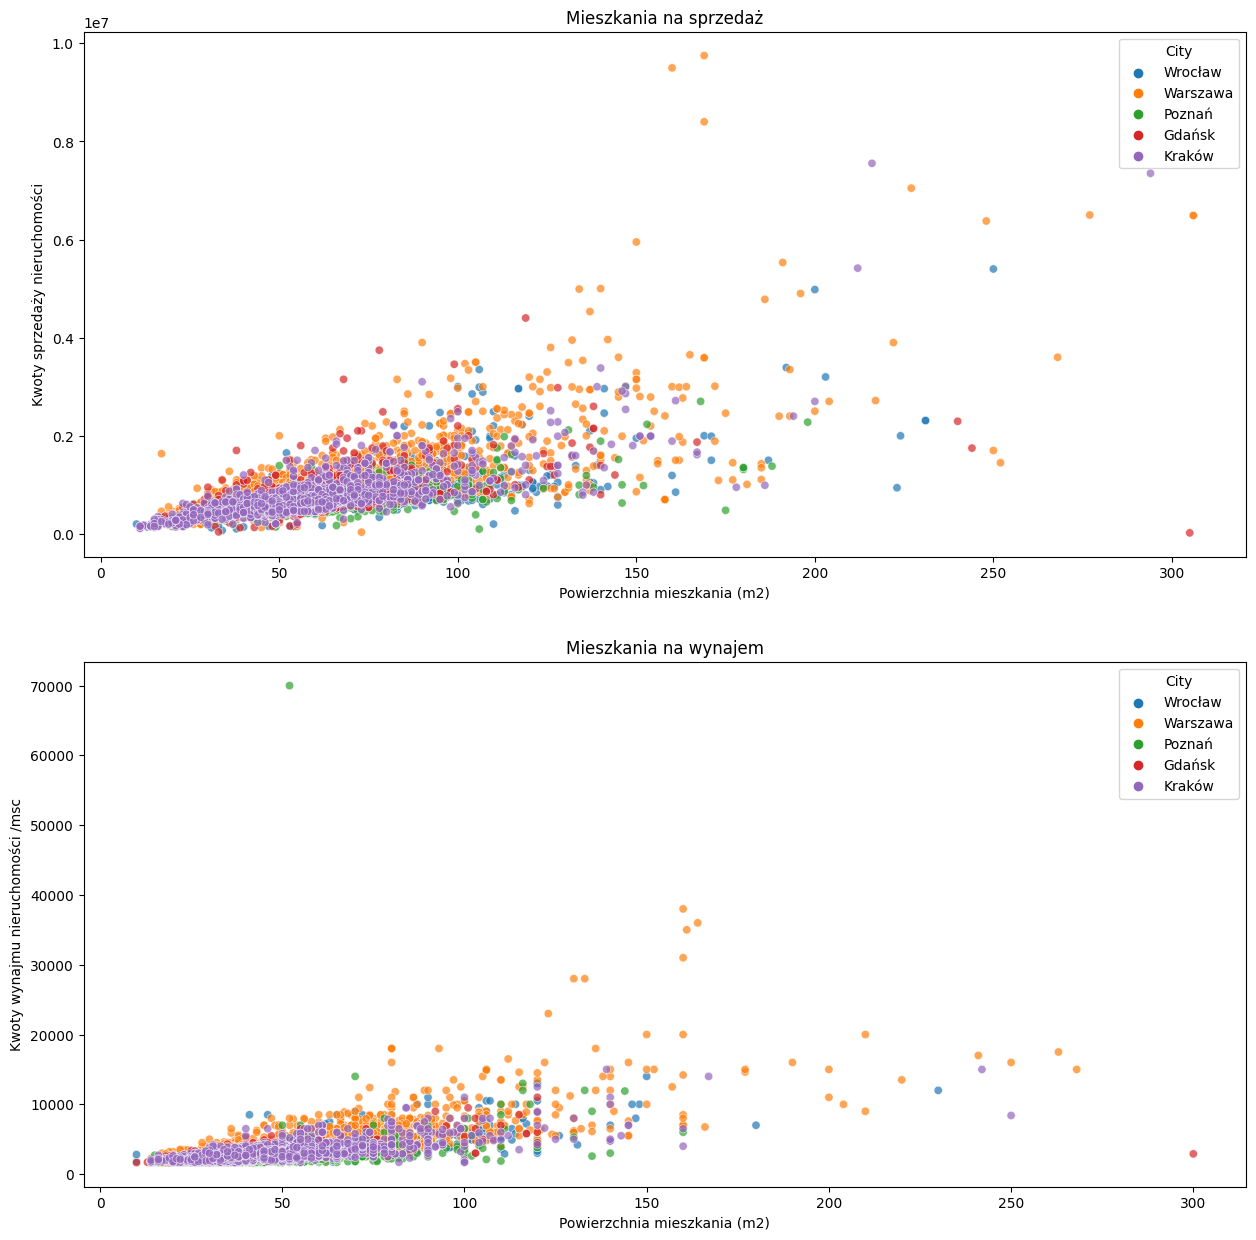

In [21]:
fig, ax = plt.subplots(2,1, figsize=(15,15))

sns.scatterplot(data=df_sell, x='Sq_meters', y='Price', hue='City', ax=ax[0], alpha=0.7)
ax[0].set_xlabel('Powierzchnia mieszkania (m2)')
ax[0].set_ylabel('Kwoty sprzedaży nieruchomości')
ax[0].set_title('Mieszkania na sprzedaż')

sns.scatterplot(data=df_rent, x='Sq_meters', y='Price', hue='City', ax=ax[1], alpha=0.7)
ax[1].set_xlabel('Powierzchnia mieszkania (m2)')
ax[1].set_ylabel('Kwoty wynajmu nieruchomości /msc')
ax[1].set_title('Mieszkania na wynajem')

W kategorii sprzedaży jak i wynajmu mieszkania dominuje Warszawa, której kwoty są wyższe dla niektórych rekordów. I przykrywają one tym samym resztę danych. Rekordy dla Krakowa, Gdańska, Wrocławia nie wyróżniają się szczególnie na wykresie dla mieszkań poniżej 100m2. Są one 'przykryte' rekordami od Krakowa, więc mają one podobne wartości.

Dla sprzedaży mieszkań powyżej 100m2 widac bardzo duże wahania cenowe w zalezności od powierzchni. Dominujące rekordy są od Warszawy. 

Dla mieszkań na wynajem równiez wahania cenowe się zmieniają od mieszkań o powierzchni większej niż 100m2, jednak nie różnice te nie są aż tak spektakularne i wykazują bardziej liniowy trend.  

# 2.4 Jak ceny zmieniają się od powierzchni danego typu mieszkania w Warszawie?

<Axes: xlabel='Sq_meters', ylabel='Price'>

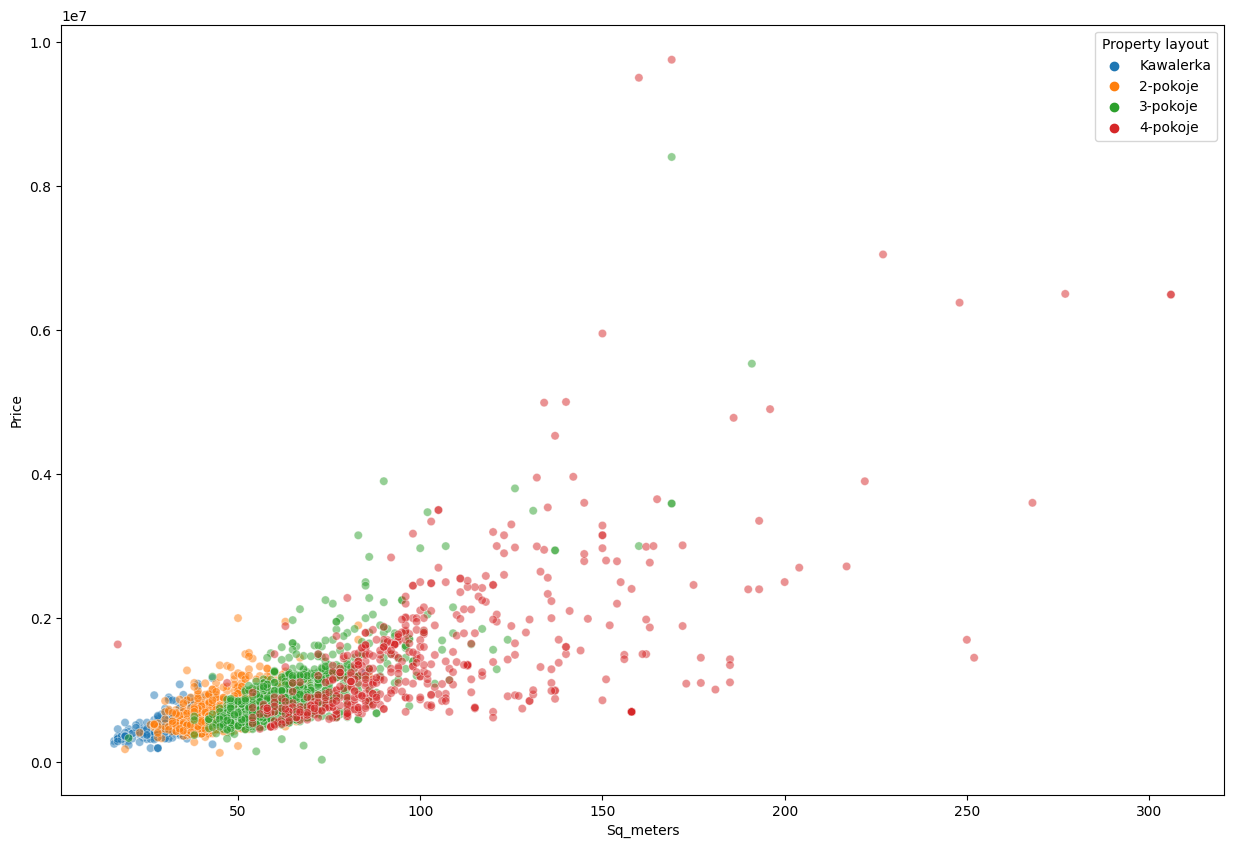

In [22]:
df_warszawa = df_sell[df_sell['City'] == 'Warszawa']

fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df_warszawa, x='Sq_meters', y='Price', hue='Property layout', ax=ax, alpha=0.5)


Mieszkania na sprzedaż w warszawie (3 i 4 pokojowe) ulegają dużym wahaniom cenowym.  
Ewentualne modele predykcyjne regresji liniowej mogą okazać się dość niedokładne 

Kawalerki i mieszkania dwupokojwe zachowują trend rosnącej ceny wraz ze zwiększaniem się powierzchni.

Wykres ten będzie póżniej podstawą do wykonania modelu regresji liniowej oraz do wstępnego zidentyfikowania wartości odstających

# 2.5 W jakim mieście jest największa ilość ofert na mieszkania? 

Text(0, 0.5, 'Ilość dostępnych ofert')

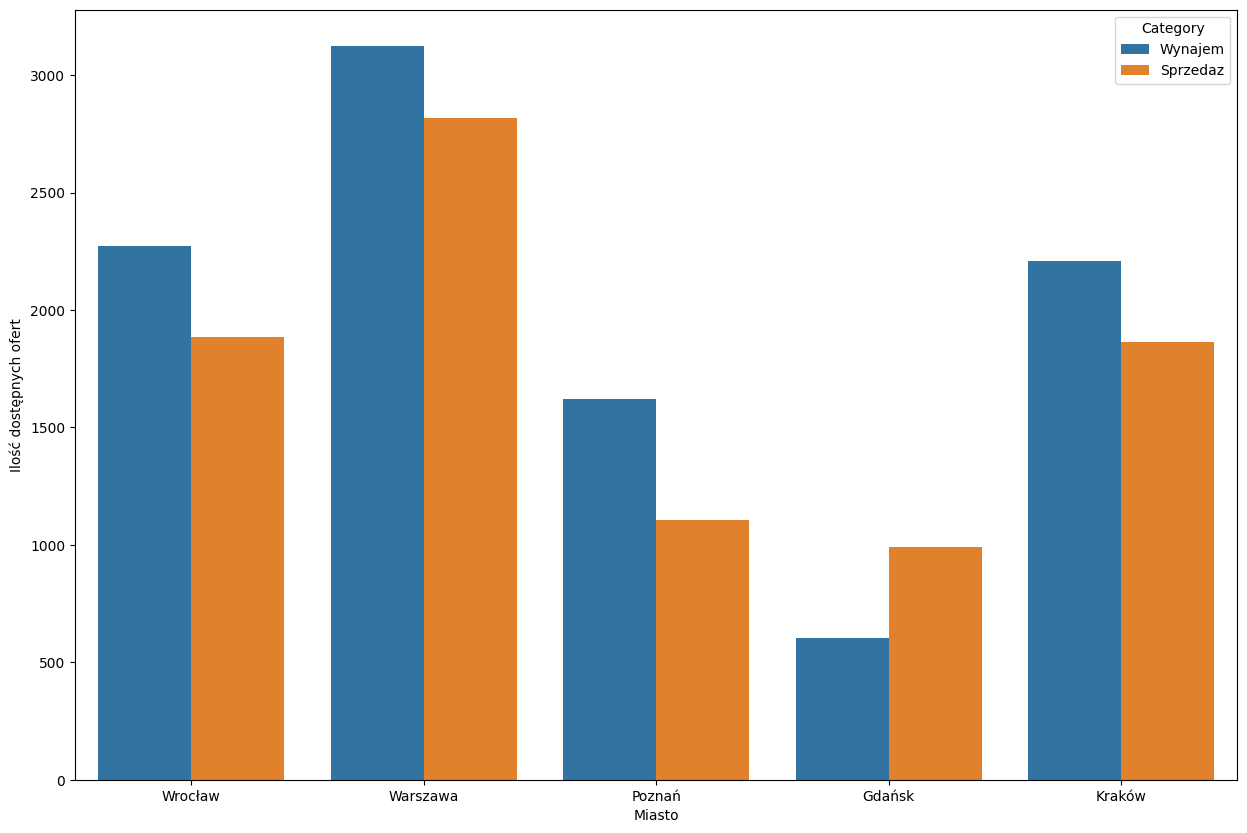

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(data=df, x='City', y='Price',hue='Category', estimator=len, ax=ax)
ax.set_xlabel('Miasto')
ax.set_ylabel('Ilość dostępnych ofert')

Najwyższą liczbę ofert w maju 2023 pod względem ofert sprzedaży jak i wynajmu miała Warszawa z wynikiem około 3 100 mieszkań na wynajem i 2 800 ofert mieszkań na sprzedaż. Kolejnymi miastami pod względem ilości ogłoszeń są odpowiednio Kraków, Wrocław, Poznań i Gdańsk. 

W Gdańsku liczba ogłoszeń na sprzedarz jest o około 1 800 mniejsza od Warszawy.  
W każdym mieście oprócz Gdańska liczba ofert mieszkań na wynajem jest większa od liczby ofert na sprzedaż o około 400 ogłoszeń. 
Kraków i Wrocław posiadają bardzo zbliżone ilości miekszań na wynajem i na sprzedaż. 

# 2.6 Czy średnie rozmiary mieszkań różnią się między sobą w poszczególnych miastach?

Text(0.5, 1.0, 'Mieszkania na wynajem')

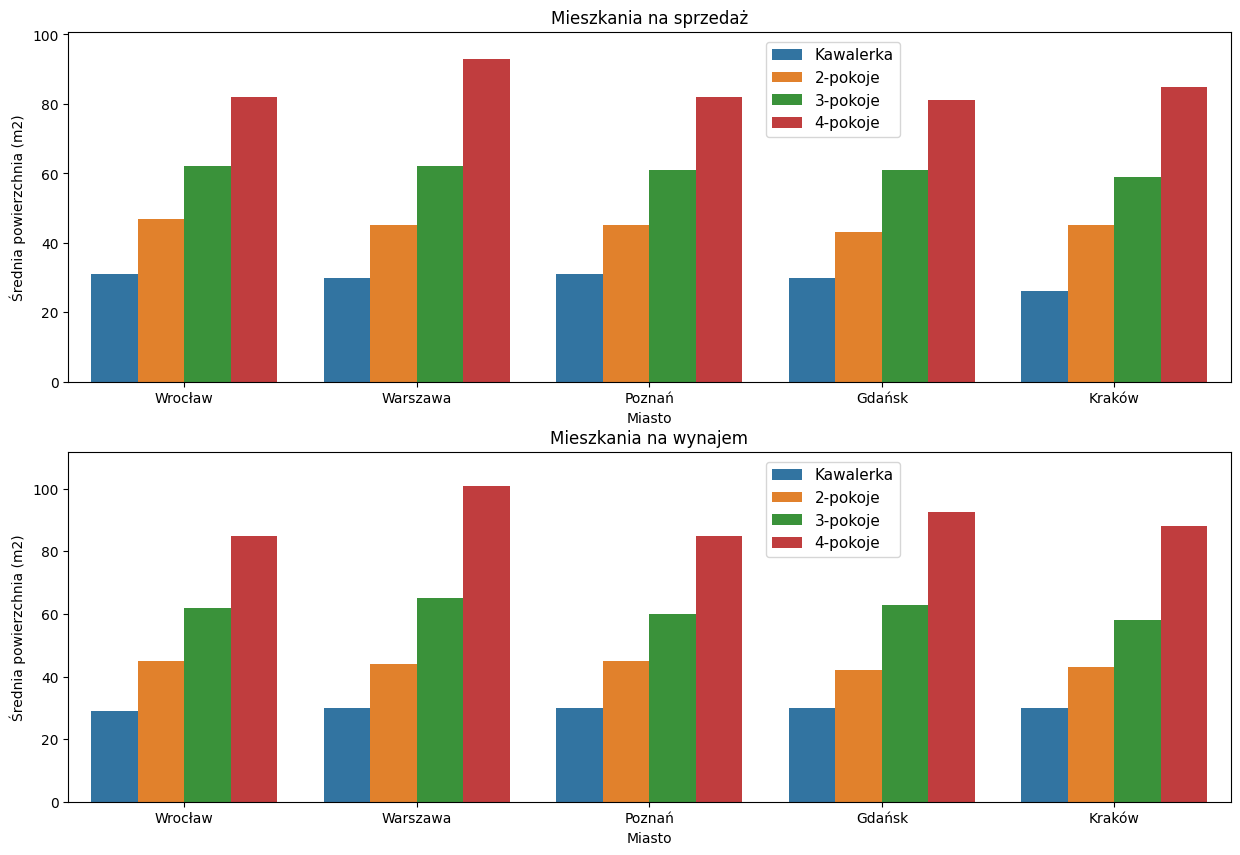

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(data=df_sell, x='City', y='Sq_meters',hue='Property layout', estimator=np.median, ax=ax[0],errwidth=0)
ax[0].set_xlabel('Miasto')
ax[0].set_ylabel('Średnia powierzchnia (m2)')
ax[0].set_title('Mieszkania na sprzedaż')

sns.barplot(data=df_rent, x='City', y='Sq_meters',hue='Property layout', estimator=np.median, ax=ax[1],errwidth=0)
ax[1].set_xlabel('Miasto')
ax[1].set_ylabel('Średnia powierzchnia (m2)')

ax[0].legend(loc=[0.6,0.7], fontsize=11)
ax[1].legend(loc=[0.6,0.7], fontsize=11)
ax[1].set_title('Mieszkania na wynajem')


Średnie rozmiary mieszkań mają bardzo zbliżone wartości dla każdych z typów mieszkań.

Nie odnotowano również takich różnic w mieszkaniach na wynajem.

Rozmiary we wszystkich tych miastach są raczej podobne. Wyjątkie może być Warszawa, gdzie widać, że średni rozmiar mieszkań na wynajem 4-pokojowych jest większy od innych miast. 

# 2.7  Czy są różnice w ilości dostępnych ofert na poszczególne typy mieszkań w zależności od miasta?

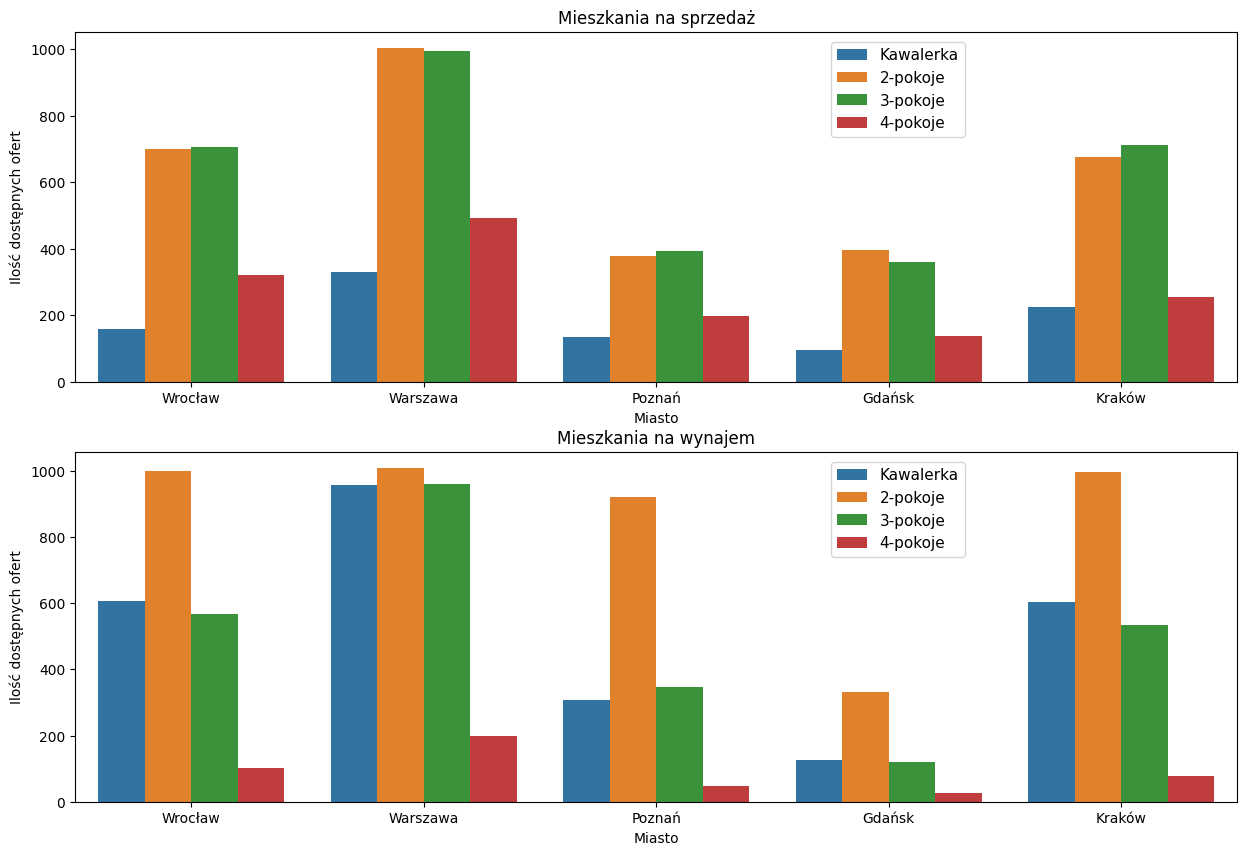

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(data=df_sell, x='City', y='Price',hue='Property layout', estimator=len, ax=ax[0])
ax[0].set_xlabel('Miasto')
ax[0].set_ylabel('Ilość dostępnych ofert')
ax[0].set_title('Mieszkania na sprzedaż')


sns.barplot(data=df_rent, x='City', y='Price',hue='Property layout', estimator=len, ax=ax[1])
ax[1].set_xlabel('Miasto')
ax[1].set_ylabel('Ilość dostępnych ofert')
ax[1].set_title('Mieszkania na wynajem')


ax[0].legend(loc=[0.65,0.7], fontsize=11)
ax[1].legend(loc=[0.65,0.7], fontsize=11)

**Oferty na sprzedaż**

W każdym z pięciu wybranych miast dominują oferty na 2 i 3 pokojowe mieszkania. Największy wybór takich mieszkań mamy w Warszawie (około 1 000 ogłoszeń), kolejnym miastem jest Wrocław i Kraków z podobną ilością ofert (ok. 700). Około 400 ofert na sprzedaż na mieszkania 2 i 3 pokojowe znajdziemy w Poznaniu i Gdańsku.

Najmniejszy wybór mamy pośród kawalerek praktycznie w każdym mieście. Tylko w Warszawie i Krakowie liczba ofert na sprzedaż kawalerek jest większa od 200, w pozostałych przypadkach mniej. 

**Oferty na wynajem** 

Największy wybór pod względem mieszkań na wynajem jest w Warszawie, gdzie liczba ofert na mieszkania dwupokojowe, kawalerki i 3-pokojowe jest największa i wynosi około 1 000 ogłoszeń dla każdej z tych kategorii. 

W pozostałych miastach zdecydowanie większość ofert na wynajem to mieszkania dwupokojwe. 

Wszystkie miasta charakteryzuje brak dużej liczby ogłoszeń na mieszkania 4-pokojowe. Tego typu mieszkania są raczej częściej kupowane niż brane na wynajem, co widać kontrastwo po ilości ofert na sprzedaż.

# 2.8 Jaki jest cenowy rozkład mieszkań w zależności dwupokojowych w zależności od miasta?   

<Axes: xlabel='City', ylabel='Price'>

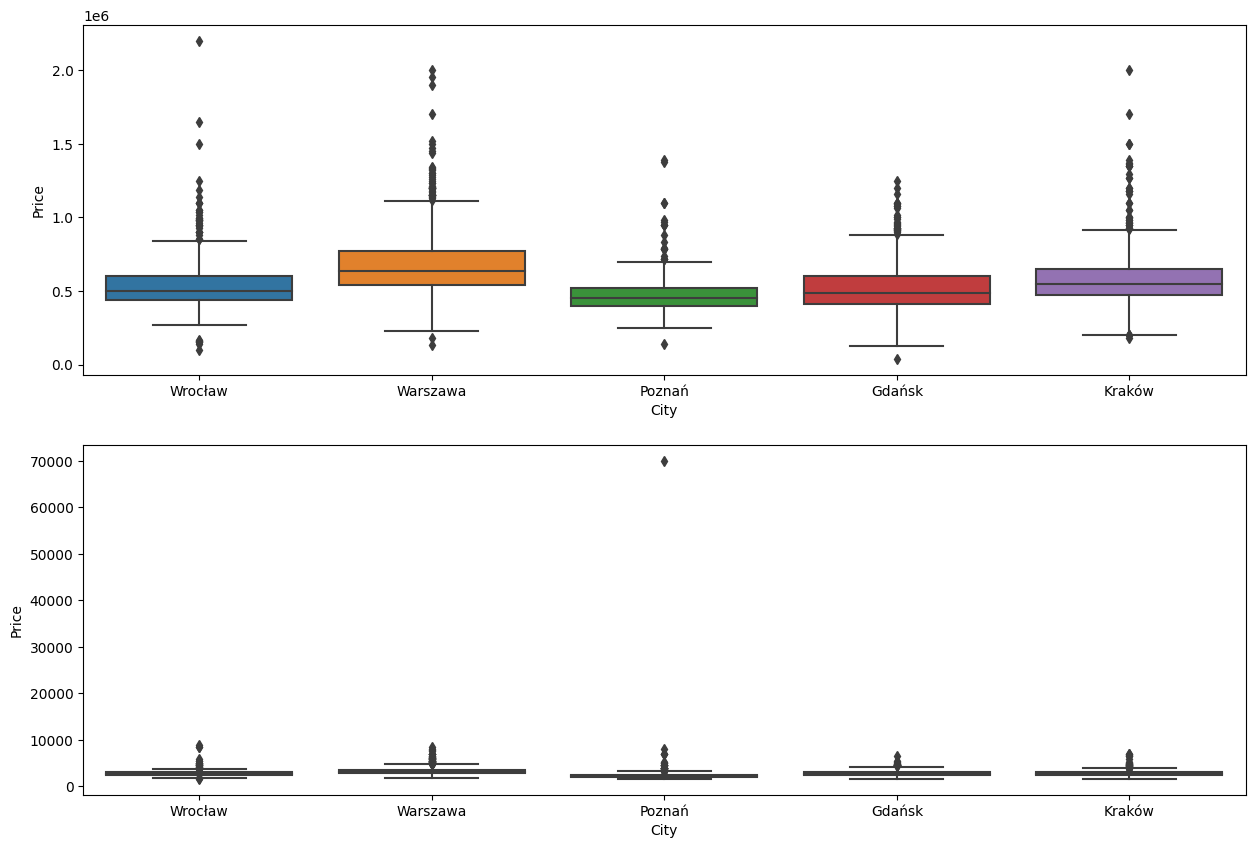

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(data=df_sell[df_sell['Rooms']==2], x='City', y='Price', ax=ax[0])
sns.boxplot(data=df_rent[df_rent['Rooms']==2], x='City', y='Price', ax=ax[1])

In [27]:
df_rent[df_rent['Price']>40000]

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
11233,Poznań,Stare Miasto,Wynajem,2-pokoje,70000.0,Do negocjacji,52,2,https://www.olx.pl/d/oferta/mieszkanie-za-odst...


In [28]:
df_rent = df_rent.drop(11233) #Przypadek odstający

Text(0.5, 1.0, 'Mieszkania na wynajem')

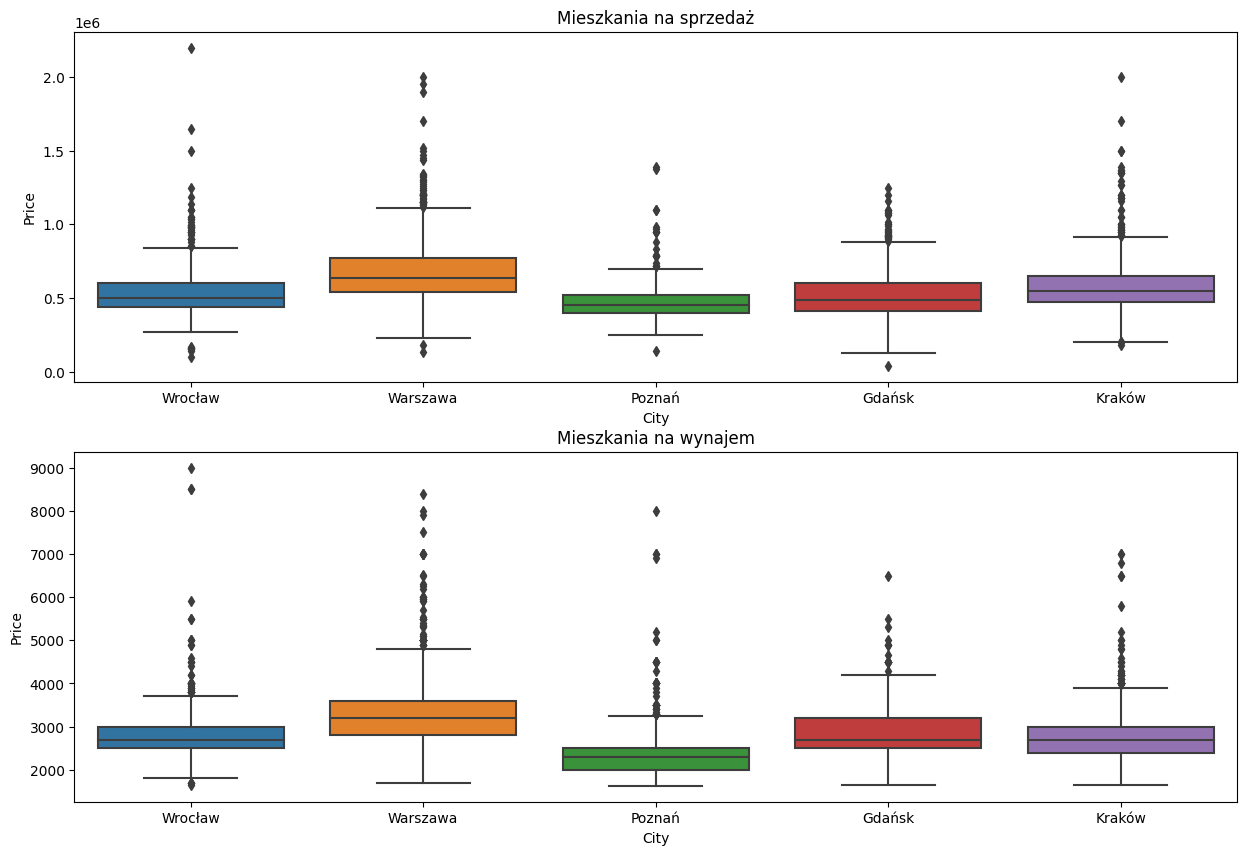

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(data=df_sell[df_sell['Rooms']==2], x='City', y='Price', ax=ax[0])
ax[0].set_title('Mieszkania na sprzedaż')
sns.boxplot(data=df_rent[df_rent['Rooms']==2], x='City', y='Price', ax=ax[1])
ax[1].set_title('Mieszkania na wynajem')


Mediany cen mieszkań zmieniają się wraz z miastem. 

Widać sporą ilość rekordów odstających dla przypadków wynajmowanych mieszkań jak i dla mieszkań na sprzedaż

In [30]:
df_two_room = df_sell[df_sell['Rooms'] == 2]
df_two_room[df_two_room['Price']>1e6]

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink,Price/m2
2553,Wrocław,Śródmieście,Sprzedaz,2-pokoje,1100000.0,Brak możliwości negocjacji,56,2,https://www.olx.pl/d/oferta/apartament-16-piet...,19642.857143
2763,Wrocław,Psie Pole,Sprzedaz,2-pokoje,1050000.0,Brak możliwości negocjacji,55,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,19090.909091
2781,Wrocław,Śródmieście,Sprzedaz,2-pokoje,1037000.0,Brak możliwości negocjacji,71,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,14605.633803
2809,Wrocław,Stare Miasto,Sprzedaz,2-pokoje,2200000.0,Brak możliwości negocjacji,110,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,20000.000000
2833,Wrocław,Nie podano,Sprzedaz,2-pokoje,1034586.0,Brak możliwości negocjacji,43,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,24060.139535
...,...,...,...,...,...,...,...,...,...,...
17485,Kraków,Stare Miasto,Sprzedaz,2-pokoje,1390000.0,Brak możliwości negocjacji,69,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,20144.927536
17502,Kraków,Stare Miasto,Sprzedaz,2-pokoje,1100000.0,Brak możliwości negocjacji,76,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,14473.684211
17520,Kraków,Zwierzyniec,Sprzedaz,2-pokoje,1295000.0,Brak możliwości negocjacji,61,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,21229.508197
17526,Kraków,Stare Miasto,Sprzedaz,2-pokoje,1048107.6,Brak możliwości negocjacji,47,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,22300.161702


In [31]:
df_two_room.loc[2763]['WebLink'] #Wysoki standard, umeblowane, klimatyzacja 

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/pieknie-wykonczone-2-pokojowe-mieszkanie-ID4lobm.html'

In [32]:
df_two_room.loc[17485]['WebLink'] #Centruk Krakowa, Wysoki standard, umeblowane

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/centrum-rynek-500-m-cisza-zadbana-kamienica-ID4kHqT.html'

<Axes: >

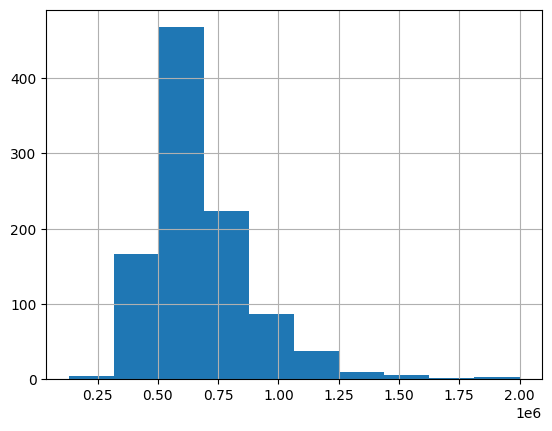

In [33]:
df_two_room[df_two_room['City']=='Warszawa']['Price'].hist()

<Axes: >

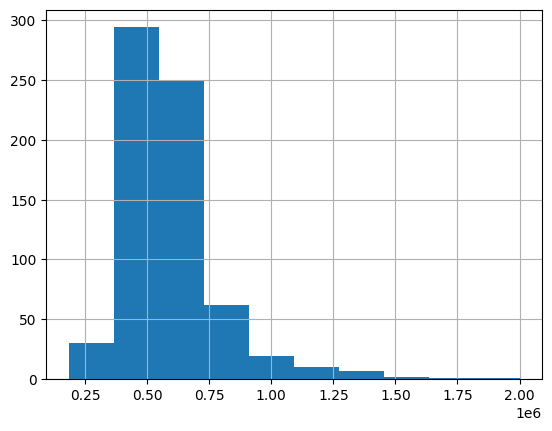

In [34]:
df_two_room[df_two_room['City']=='Kraków']['Price'].hist()

Odstajace rekordy mogą świadczyć o bardzo dobrze wyposażonym mieszkaniu po remoncie w bardzo dobrej lokalizacji (np. Centrum)

Po załączonych wyżej histogramach, widać, że nie jest za dużo takich mieszkań. Sumarycznie będzie to pewnie około 100 ofert dla każdego miasta

# 2.9 Top 3 dzielnic w każdym mieście z największą liczbą ogłoszeń 

In [35]:
data_frames = []
for city, table_cit in df.groupby('City'):
    
    district_city = {}
    
    for district, table_dis in table_cit.groupby('District'):
        district_city[district] = [len(table_dis)]
    df_temporary = pd.DataFrame(district_city).T
    
    top3 = df_temporary.sort_values(by=df_temporary.columns[0],ascending=False)[:3] 
    
    df_temporary = pd.DataFrame({
        'City': [city]*3,
        'District': top3.index.values,
        'Offers': top3[0].values
    })
    
    data_frames.append(df_temporary)
    
df_top3_districts = pd.concat(data_frames, ignore_index=True)

In [36]:
df.groupby(['City','District']).count()['Price']['Warszawa'].sort_values(ascending=False)[:3]

District
Mokotów           898
Wola              652
Praga-Południe    539
Name: Price, dtype: int64

In [37]:
df_top3_districts

,City,District,Offers
0,Gdańsk,Nie podano,440
1,Gdańsk,Śródmieście,167
2,Gdańsk,Jasień,163
3,Kraków,Podgórze,450
4,Kraków,Prądnik Biały,415
5,Kraków,Stare Miasto,362
6,Poznań,Stare Miasto,306
7,Poznań,Grunwald,305
8,Poznań,Jeżyce,221
9,Warszawa,Mokotów,898


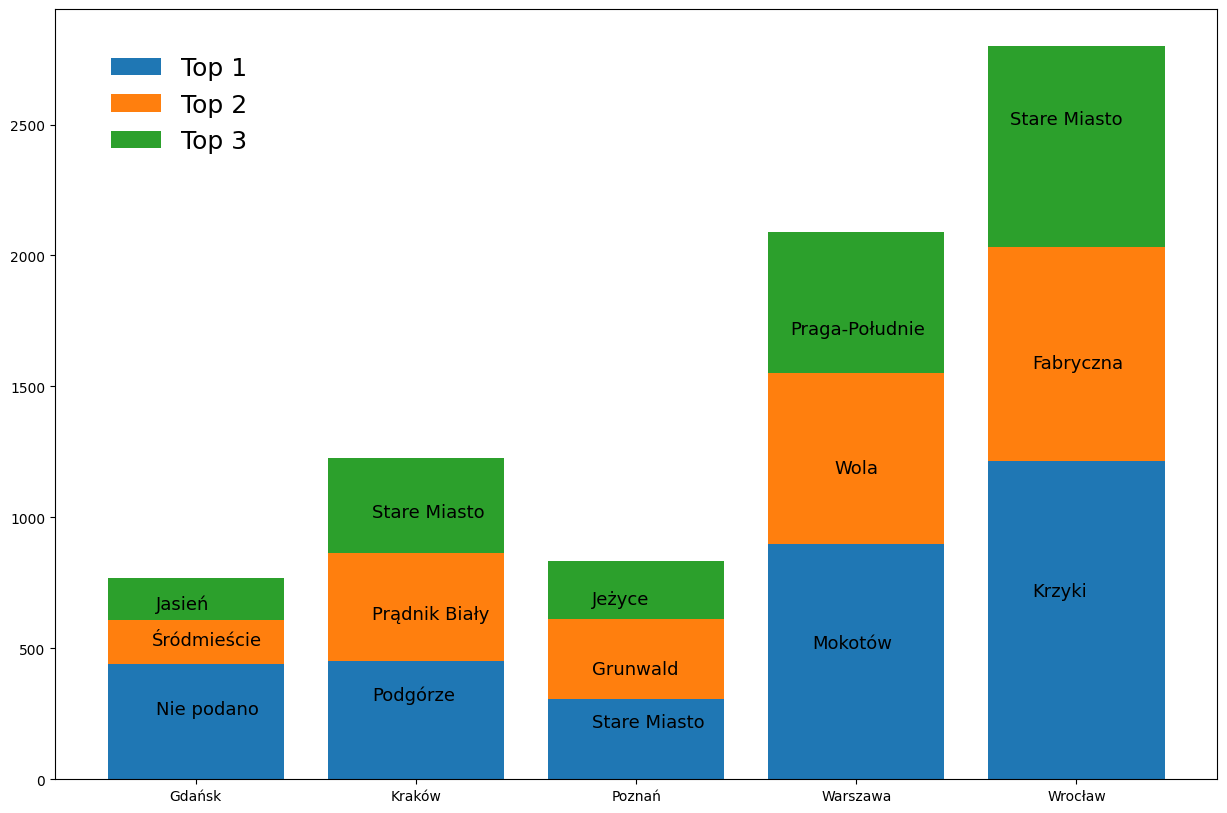

In [38]:
one = df_top3_districts.iloc[::3,:]
two = df_top3_districts.iloc[1::3,:]
three = df_top3_districts.iloc[2::3,:]


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x=one['City'],height=one['Offers'], label='Top 1')
ax.bar(x=two['City'],height=two['Offers'], bottom=one['Offers'], label='Top 2')
ax.bar(x=three['City'],height=three['Offers'], bottom=one['Offers'].values+two['Offers'].values, label='Top 3')




#Gdańsk
ax.text(-0.18, 250, 'Nie podano',fontsize=13)
ax.text(-0.2, 510, 'Śródmieście',fontsize=13)
ax.text(-0.18, 650, 'Jasień',fontsize=13)

#Kraków
ax.text(0.8, 300, 'Podgórze',fontsize=13)
ax.text(0.8, 610, 'Prądnik Biały',fontsize=13)
ax.text(0.8, 1000, 'Stare Miasto',fontsize=13)
    
#Poznań
ax.text(1.8, 200, 'Stare Miasto',fontsize=13)
ax.text(1.8, 400, 'Grunwald',fontsize=13)
ax.text(1.8, 670, 'Jeżyce',fontsize=13)
    
#Warszawa
ax.text(2.8, 500, 'Mokotów',fontsize=13)
ax.text(2.9, 1170, 'Wola',fontsize=13)
ax.text(2.7, 1700, 'Praga-Południe',fontsize=13)

#Wrocław
ax.text(3.8, 700, 'Krzyki',fontsize=13)
ax.text(3.8, 1570, 'Fabryczna',fontsize=13)
ax.text(3.7, 2500, 'Stare Miasto',fontsize=13)

    
ax.legend(loc=[0.04,0.8], fontsize=18, frameon=False)

Powyższy barplot prezentuje 3 dzielnice z największą liczbą ofert dla każdego miasta.

Najwięcej ofert jest we Wrocławiu w dzielnicy "Krzyki" (1 300) , kolejny jest Mokotów w Warszawie (<1 000) i Podgórze w Krakowie (<400 ogłoszeń). W Gdańsku największa ilość ofert nie ma podanej dzielnicy przez właścicieli, a w Poznaniu dominują oferty na Starym Mieście.

Te dane mają bardziej charakter ciekawostkowy, dzielnica Krzyki we Wrocławiu oznacza również oferty mieszkań z innych dzielnic. (Krzyki składają się z około 3 jak nie 4 dodatkowych dzielnic w tym zestawieniu. Możliwe, że OLX nie rodziela tych ofert na poszczególne dzielnice). Całkiem prawdodpodobne jest to, że takie zjawisko może zachodzić dla pozostałych miast.

# 2.10 Najkorzystaniejsze oferty sprzedażowe dla każdego miasta

In [39]:
df_sell[(df_sell['City'] == 'Wrocław') & (df_sell['Property layout'] == 'Kawalerka')].sort_values(by=['Price/m2'])


,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink,Price/m2
2417,Wrocław,Fabryczna,Sprzedaz,Kawalerka,70000.0,Do negocjacji,34,1,https://www.olx.pl/d/oferta/odstapie-mieszkani...,2058.823529
2308,Wrocław,Fabryczna,Sprzedaz,Kawalerka,125000.0,Brak możliwości negocjacji,31,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,4032.258065
2391,Wrocław,Psie Pole,Sprzedaz,Kawalerka,275000.0,Brak możliwości negocjacji,33,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,8333.333333
2369,Wrocław,Śródmieście,Sprzedaz,Kawalerka,467500.0,Brak możliwości negocjacji,55,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,8500.000000
2275,Wrocław,Śródmieście,Sprzedaz,Kawalerka,349000.0,Brak możliwości negocjacji,39,1,https://www.olx.pl/d/oferta/mieszkanie-w-super...,8948.717949
...,...,...,...,...,...,...,...,...,...,...
2281,Wrocław,Stare Miasto,Sprzedaz,Kawalerka,550000.0,Brak możliwości negocjacji,26,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,21153.846154
2333,Wrocław,Stare Miasto,Sprzedaz,Kawalerka,701148.0,Brak możliwości negocjacji,31,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,22617.677419
2386,Wrocław,Nie podano,Sprzedaz,Kawalerka,839000.0,Brak możliwości negocjacji,36,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,23305.555556
2410,Wrocław,Stare Miasto,Sprzedaz,Kawalerka,700000.0,Brak możliwości negocjacji,30,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,23333.333333


In [40]:
for city in cities:
    print('Miasto: ', city)
    for prop in prop_lay:
        print('Typ mieszkania: ', prop)
        data =df_sell[(df_sell['City'] == city) & (df_sell['Property layout'] == prop)].sort_values(by=['Price/m2'])[:3] 
        print(data[['District','Price','Sq_meters','WebLink']])
        print('')

Miasto:  Wrocław
Typ mieszkania:  Kawalerka
       District     Price  Sq_meters   
2417  Fabryczna   70000.0         34  \
2308  Fabryczna  125000.0         31   
2391  Psie Pole  275000.0         33   

                                                WebLink  
2417  https://www.olx.pl/d/oferta/odstapie-mieszkani...  
2308  https://www.olx.plhttps://www.otodom.pl/pl/ofe...  
2391  https://www.olx.plhttps://www.otodom.pl/pl/ofe...  

Typ mieszkania:  2-pokoje
       District     Price  Sq_meters   
3035  Fabryczna  101849.0         38  \
2611  Psie Pole  170000.0         62   
3077  Psie Pole  160000.0         54   

                                                WebLink  
3035  https://www.olx.plhttps://www.otodom.pl/pl/ofe...  
2611  https://www.olx.pl/d/oferta/mieszkanie-tbs-do-...  
3077  https://www.olx.pl/d/oferta/mieszkanie-tbs-54m...  

Typ mieszkania:  3-pokoje
       District     Price  Sq_meters   
3822  Fabryczna  199000.0        110  \
3791  Psie Pole  150000.0         54

# 2.11 Ile jest ofert ze strony otodom? 

([<matplotlib.patches.Wedge at 0x221ac4bcfd0>,
 [Text(-0.32246230801247566, 1.051673932315177, 'Otodom'),
  Text(0.32246240647729435, -1.0516739021240722, 'Olx')],
 [Text(-0.1758885316431685, 0.5736403267173692, '59%'),
  Text(0.17588858535125143, -0.5736403102494938, '41%')])

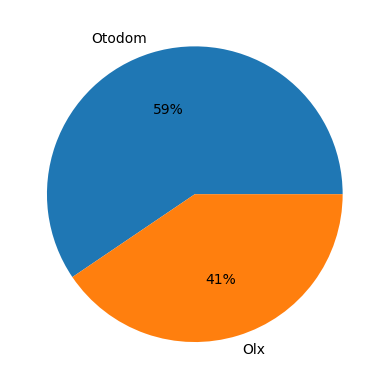

In [41]:
df['Otodom'] = df['WebLink'].apply(lambda x: 1 if 'otodom.pl' in x else 0)
plt.pie(df['Otodom'].value_counts(normalize=True), labels=['Otodom','Olx'], autopct='%.f%%')

Dane były scrapowane ze strony OLX. Zadziwiające jest to, że prawie 60% ogłoszeń znajdujących się na tej stronie przekierowuje na serwis otodom.pl

# 2.12 Ile jest ofert z zaznaczoną możliwością negocjacji ceny? 

([<matplotlib.patches.Wedge at 0x221ac50d700>,
 [Text(-1.0635587449438708, 0.2807895939193948, 'Brak negocjacji'),
  Text(1.0635587646609326, -0.28078951923622686, 'Możliwa negocjacja')],
 [Text(-0.5801229517875658, 0.15315796031966988, '92%'),
  Text(0.5801229625423268, -0.15315791958339645, '8%')])

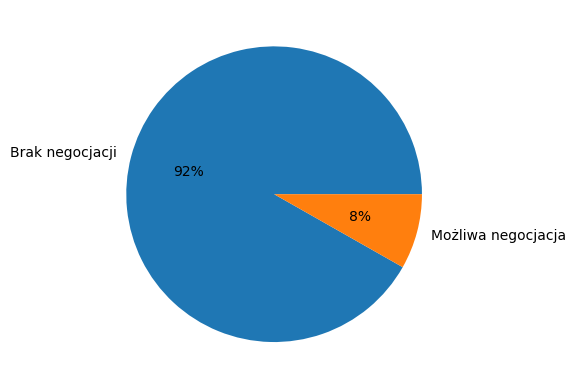

In [42]:
plt.pie(df['Negotiation'].value_counts(normalize=True), labels=['Brak negocjacji','Możliwa negocjacja'], autopct='%.f%%')

In [43]:
offers_with_neg_option = df[df['Negotiation'] == 'Do negocjacji']['Category']
print('Ilość ofert z możliwością negocjacji: ', len(offers_with_neg_option))

Ilość ofert z możliwością negocjacji:  1520


([<matplotlib.patches.Wedge at 0x221ac55c3d0>,
 [Text(-0.4251490322295987, 1.0145187531013096, 'Wynajem'),
  Text(0.42514893724349595, -1.0145187929066302, 'Sprzedaż')],
 [Text(-0.23189947212523562, 0.5533738653279869, '63%'),
  Text(0.23189942031463412, -0.55337388703998, '37%')])

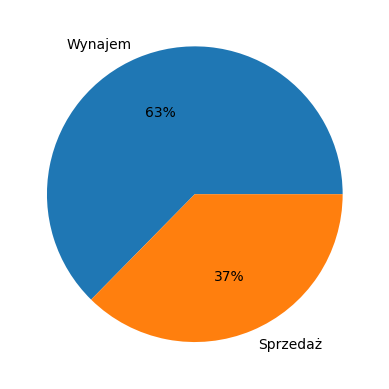

In [44]:
plt.pie(offers_with_neg_option.value_counts(normalize=True), labels=['Wynajem','Sprzedaż'], autopct='%.f%%')

Tylko 8 % włacicieli deklaruje możlwiość negocjacji ceny, co daje tylko 1520 ofert z taką opcją. 
Ponadto oferty, które są negocjowalne to w 60% oferty na wynajem mieszkania, zatem tylko około 600 ofert podlega możliwości negocjacji 

# 2. 13 Czy w jakimś mieście jest więcej ofert z możliwością negocjacji? 

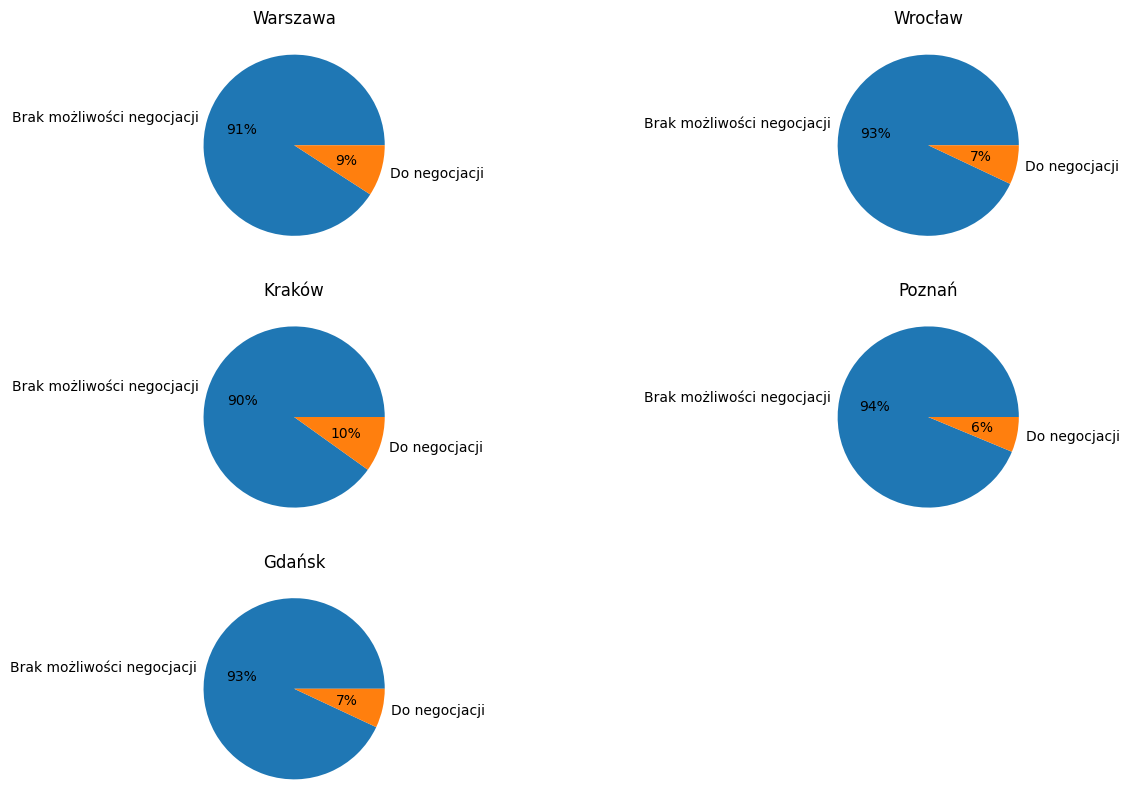

In [45]:
fig, ax = plt.subplots(3,2,figsize=(15,10))

wro = df[df['City'] == 'Wrocław']['Negotiation']
wwa = df[df['City'] == 'Warszawa']['Negotiation']
poz = df[df['City'] == 'Poznań']['Negotiation']
krk = df[df['City'] == 'Kraków']['Negotiation']
gda = df[df['City'] == 'Gdańsk']['Negotiation']

ax[0][0].pie(wwa.value_counts(normalize=True), labels=wwa.value_counts().index, autopct='%.f%%')
ax[0][0].set_title('Warszawa')

ax[0][1].pie(wro.value_counts(normalize=True), labels=wro.value_counts().index, autopct='%.f%%')
ax[0][1].set_title('Wrocław')

ax[1][0].pie(krk.value_counts(normalize=True), labels=krk.value_counts().index, autopct='%.f%%')
ax[1][0].set_title('Kraków')

ax[1][1].pie(poz.value_counts(normalize=True), labels=poz.value_counts().index, autopct='%.f%%')
ax[1][1].set_title('Poznań')

ax[2][0].pie(gda.value_counts(normalize=True), labels=gda.value_counts().index, autopct='%.f%%')
ax[2][0].set_title('Gdańsk')

fig.delaxes(ax[2,1])

Największą ilość ofert z zadeklarowaną negocjacją jest Kraków (10%). Najmniejsza ilość ofert jest w Poznaniu (6%) a w pozozostałych miastach są to wartości rzędu 7% i 9%. 